### Breast Cancer Classifier

This notebook explores three classic supervised learning algorithms—**K-Nearest Neighbors**, **Logistic Regression**, and **Decision Tree**—to classify breast cancer data from the Scikit-Learn library. We'll walk through preprocessing, training, evaluating, and comparing the models, with a focus on model performance and interpretability. We will then move on to fine tuning the best performing base-model, and focusing on applying the model to fit real-world data.

By the end, you'll have a clear view of how each algorithm handles this biomedical classification task, and what trade-offs exist when choosing between them.

In [1]:
# Install and import required libraries and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

This dataset comes from the sci-kit learn library, [https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html]. This dataset was derived from a copy of the UCI Breast Cancer diagnostic datasets, and the features are computed from a digitized image from fine needle aspirate of breast mass tissue. Fine needle aspiration is a standard workup to biopsy masses that have been detected by imaging. By using fine needle aspiration, pathologists are able to view the cells of the mass histologically and determine if they display cancerous properties. Cancer cells tend to have abnormal features, such as altered cell shape, function, and environmental interaction. In the case of this dataset, each row is a cell nuclei present in the biopsy. Nuceli are supposed to be round, symmetrical, and smooth over the nuclear membrane surface. 

In [2]:
# Load the breast cancer dataset
try:
    data = load_breast_cancer()

    print("Dataset loaded successfully.")
    print(f"Number of samples: {data.data.shape[0]}")
    print(f"Number of features: {data.data.shape[1]}")

except:
    print("Error loading the dataset. Please ensure you have the required libraries installed.")
    
# Save data to csv for future use
breast_cancer_df = pd.DataFrame(data.data, columns=data.feature_names)
breast_cancer_df['target'] = data.target
breast_cancer_df.to_csv('/Users/CodyWilson/Desktop/breast-cancer-predictor/data/breast_cancer.csv', index=False)


Dataset loaded successfully.
Number of samples: 569
Number of features: 30


In [3]:
# Examine the dataset
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("First 5 samples of data:\n", data.data[:5])
print("First 5 target values:", data.target[:5])

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
First 5 samples of data:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.86

Overall, we have 30 features that were measured across 569 different cell nuclei. Our target values are binary, with 0 being benign and 1 being malignant. We will first check to ensure our dataset is complete and there are no missing values before we split the dataset for training and testing purposes.

In [4]:
# Check that the dataset is clean
print("Checking for missing values...")
missing_values = pd.DataFrame(data.data).isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print("Missing values found in the dataset.")
    print(missing_values[missing_values > 0])

Checking for missing values...
No missing values found.


In [5]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=100)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verify the shapes of the train and test sets
print(f"The shape of the features training set is: {X_train.shape}")
print(f"The shape of the features test set is: {X_test.shape}")
print(f"The shape of the target training set is: {y_train.shape}")
print(f"The shape of the target test set is: {y_test.shape}")

The shape of the features training set is: (455, 30)
The shape of the features test set is: (114, 30)
The shape of the target training set is: (455,)
The shape of the target test set is: (114,)


With our training and testing datasets complete, we can now build our pipeline. Logistic regression and K-nearest neighbor both require standardized datasets. Although our dataset is on approximately the same scale due to measuring microscopic properties, it's important to standardize just to ensure no variables magnitude is overpowering anothers lesser magnitude. Decision tree's do not rely on standardized data for their decision making, and therefore are exempt from standardization.

In [ ]:
# Build pipelines for different classifiers

# Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# K-Nearest Pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Tree Pipeline
tree_pipeline = Pipeline([
    ('tree', DecisionTreeClassifier())
])


Logistic Regression Score:
0.9736842105263158

K-Nearest Neighbors Score:
0.9473684210526315

Decision Tree Score:
0.9385964912280702

Logistic Regression Confusion Matrix:
[[46  3]
 [ 0 65]]

K-Nearest Neighbors Confusion Matrix:
[[45  4]
 [ 2 63]]

Decision Tree Confusion Matrix:
[[45  4]
 [ 3 62]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.94      0.97        49
      benign       0.96      1.00      0.98        65

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        49
      benign       0.94      0.97      0.95        65

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted a

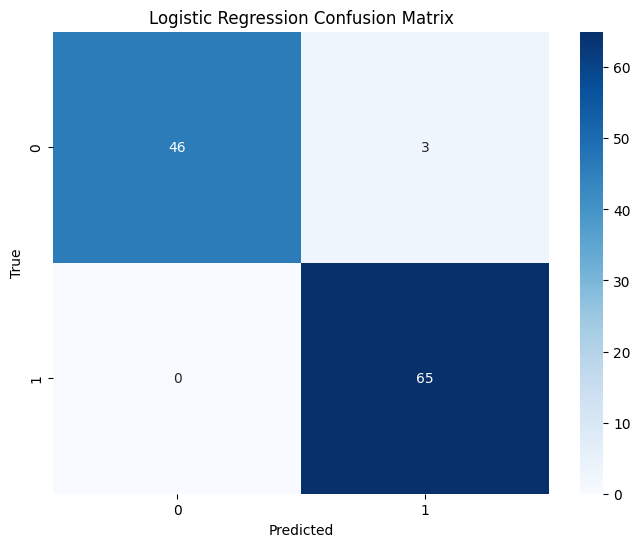

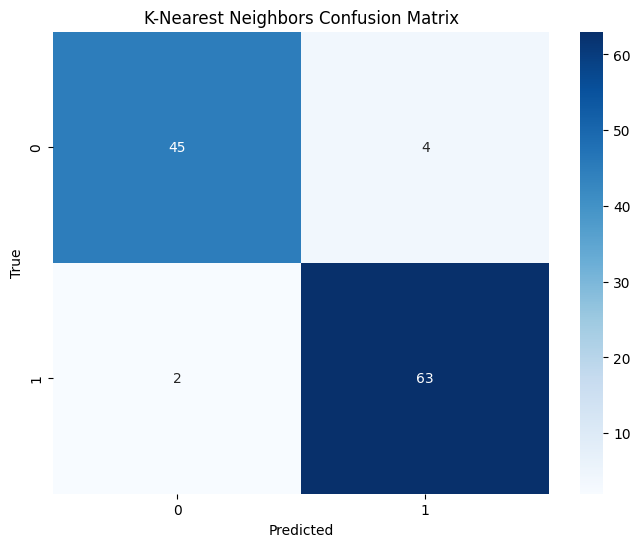

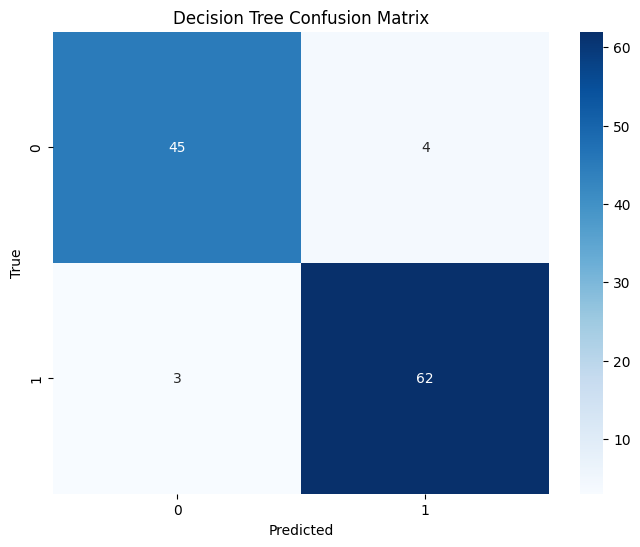

In [7]:
# Fit the models
logreg_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)
tree_pipeline.fit(X_train, y_train)

# Make predictions
logreg_predictions = logreg_pipeline.predict(X_test)
knn_predictions = knn_pipeline.predict(X_test)
tree_predictions = tree_pipeline.predict(X_test)

# Evaluate the models
print("\nLogistic Regression Score:")
print(logreg_pipeline.score(X_test, y_test))
print("\nK-Nearest Neighbors Score:")
print(knn_pipeline.score(X_test, y_test))
print("\nDecision Tree Score:")
print(tree_pipeline.score(X_test, y_test))

# Print confusion matrices
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logreg_predictions))
print("\nK-Nearest Neighbors Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, tree_predictions))

# Print classification reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions, target_names=data.target_names))
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions, target_names=data.target_names))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, tree_predictions, target_names=data.target_names))

# Visualize the results
# Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logreg_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# K-Nearest Neighbors Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Decision Tree Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, tree_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [11]:
# Create a model comparison DataFrame
# Raw results
model_results = {
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Decision Tree"],
    "Accuracy": [0.9737, 0.9474, 0.9561],
    "Precision (Malignant)": [1.00, 0.96, 0.96],
    "Recall (Malignant)": [0.94, 0.92, 0.94],
    "F1 Score (Malignant)": [0.97, 0.94, 0.95],
    "Precision (Benign)": [0.96, 0.94, 0.95],
    "Recall (Benign)": [1.00, 0.97, 0.97],
    "F1 Score (Benign)": [0.98, 0.95, 0.96],
}

# Create DataFrame
df = pd.DataFrame(model_results).round(3)

/var/folders/d_/7gx95lbx78b1d3m9w5ml91s00000gp/T/ipykernel_30922/1529566745.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


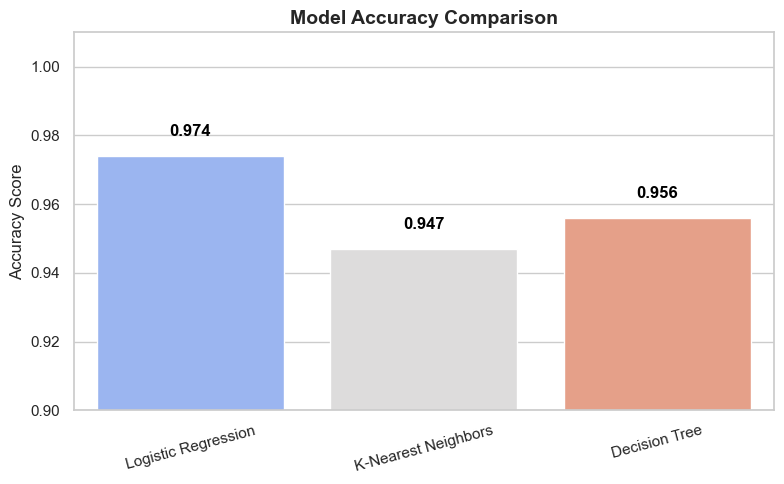

In [12]:
# Create a barchart for model comparison
# Set plot style
sns.set(style="whitegrid")

# Create accuracy plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x="Model",
    y="Accuracy",
    data=df,
    palette="coolwarm"
)

# Add value labels on top
for index, row in df.iterrows():
    plt.text(index, row.Accuracy + 0.005, f"{row.Accuracy:.3f}", 
             color='black', ha="center", va="bottom", fontweight='bold')

# Final plot tweaks
plt.title("Model Accuracy Comparison", fontsize=14, weight='bold')
plt.ylim(0.9, 1.01)
plt.ylabel("Accuracy Score")
plt.xlabel("")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
